<h1> Importing Libraries 

In [2]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
company_list=['AAPL','FB','GOOGL','TSLA','AMZN']
data = []

#Api Request
#requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/aapl?serietype=line')

for i in company_list:
    prices = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/{i}?serietype=line')
    prices = prices.json()
    
    prices = prices['historical'][-1000:]
    pricesdf =pd.DataFrame.from_dict(prices)
    
    #rename column column = name
    pricesdf=pricesdf.rename({'close':i},axis =1)
    data.append(pricesdf)
merge = [price.set_index('date') for price in data]
#print(df)
df= pd.concat(merge,axis=1)
print(df)

              AAPL      FB    GOOGL    TSLA     AMZN
date                                                
2016-03-04  103.01  108.39   730.22  201.04   575.14
2016-03-07  101.87  105.73   712.80  205.29   562.80
2016-03-08  101.03  105.93   713.53  202.60   560.26
2016-03-09  101.12  107.51   725.41  208.72   559.47
2016-03-10  101.17  107.32   732.17  205.18   558.93
...            ...     ...      ...     ...      ...
2020-02-18  319.00  217.80  1519.44  858.40  2155.67
2020-02-19  323.62  217.49  1524.87  917.42  2170.22
2020-02-20  320.30  214.58  1516.99  899.41  2153.10
2020-02-21  313.05  210.18  1483.46  901.00  2095.97
2020-02-24  298.18  200.72  1419.86  833.79  2009.29

[1000 rows x 5 columns]


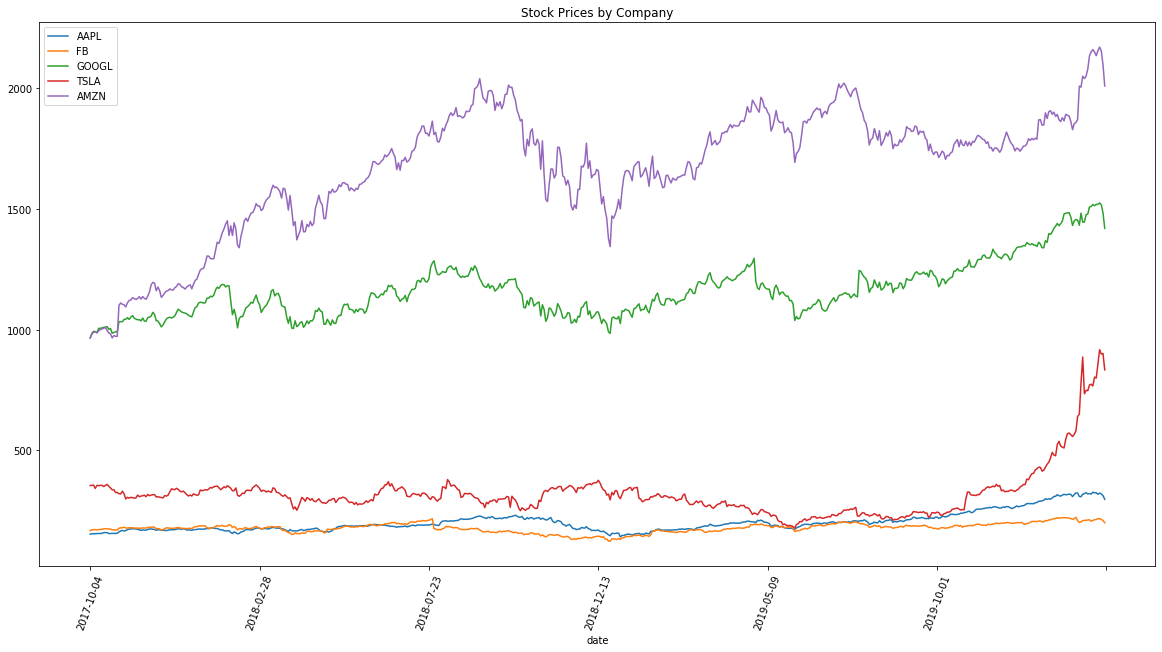

In [31]:
plt.figure(figsize=(20,10))
for i,y in enumerate(df.columns):
    df[y].plot()
plt.title('Stock Prices by Company')
plt.xticks(rotation=70)
plt.legend(df.columns)

    

<h1> Stock Comparison

                AAPL        FB     GOOGL      TSLA      AMZN
date                                                        
2016-03-04  1.000000  1.000000  1.000000  1.000000  1.000000
2016-03-07  0.988933  0.975459  0.976144  1.021140  0.978544
2016-03-08  0.980779  0.977304  0.977144  1.007760  0.974128
2016-03-09  0.981652  0.991881  0.993413  1.038201  0.972754
2016-03-10  0.982138  0.990128  1.002670  1.020593  0.971816
...              ...       ...       ...       ...       ...
2020-02-18  3.096787  2.009410  2.080798  4.269797  3.748079
2020-02-19  3.141637  2.006550  2.088234  4.563370  3.773377
2020-02-20  3.109407  1.979703  2.077442  4.473786  3.743610
2020-02-21  3.039025  1.939109  2.031525  4.481695  3.644278
2020-02-24  2.894670  1.851831  1.944428  4.147384  3.493567

[1000 rows x 5 columns]


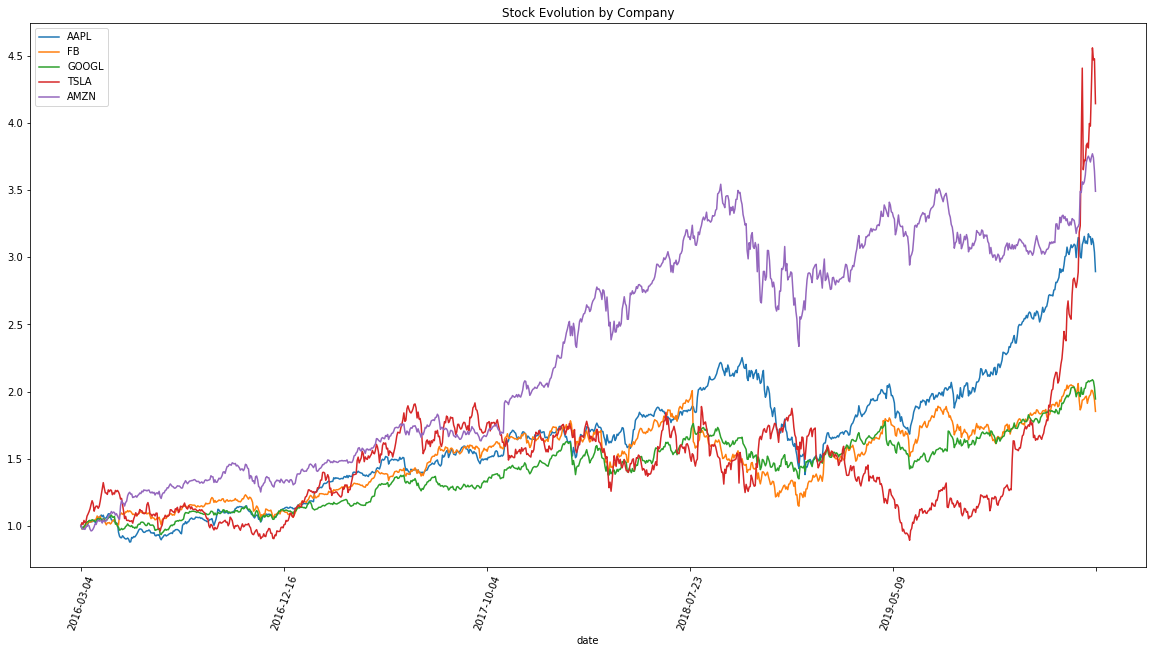

In [36]:
df = df/df.iloc[0]
print(df)
plt.figure(figsize=(20,10))

for i,y in enumerate(df.columns):
    df[y].plot()
plt.title('Stock Evolution by Company')
plt.xticks(rotation=70)
plt.legend(df.columns)


